In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from numpy import math

<ipython-input-3-af9ca3707dad>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('50_Startups.csv')

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.shape

(50, 5)

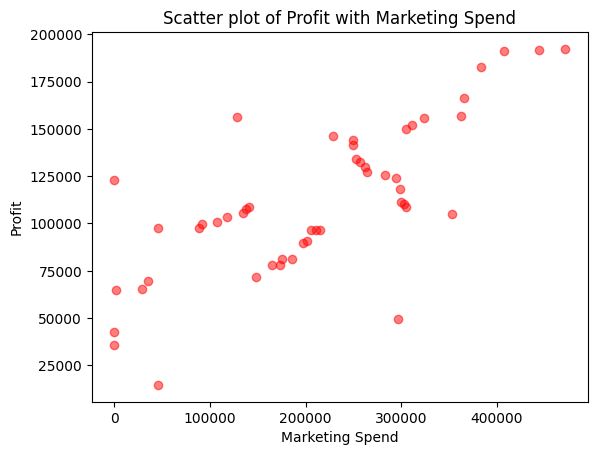

In [9]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5, color='red')
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

Text(0.5, 0, 'R&D Spend')

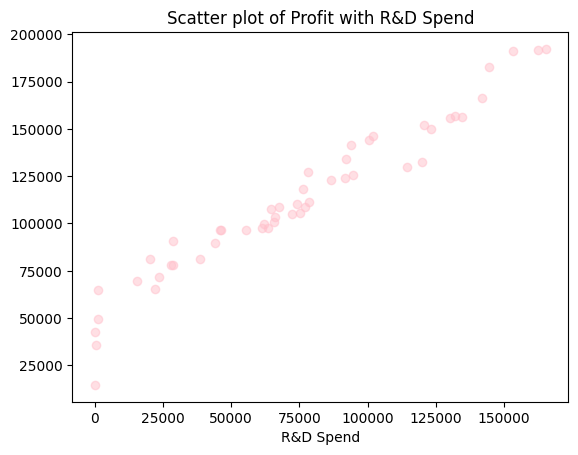

In [10]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5, color='pink')
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')

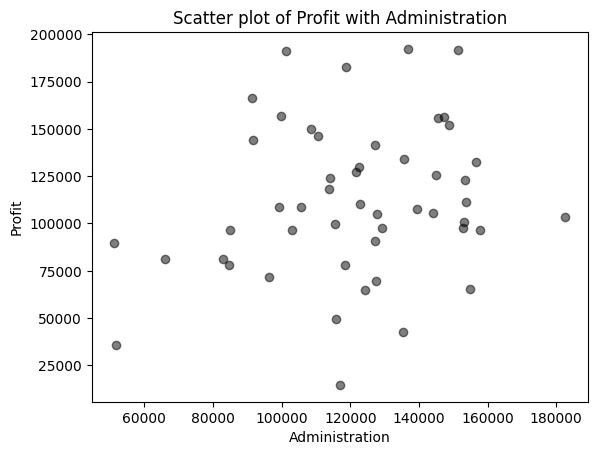

In [11]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5, color='black')
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

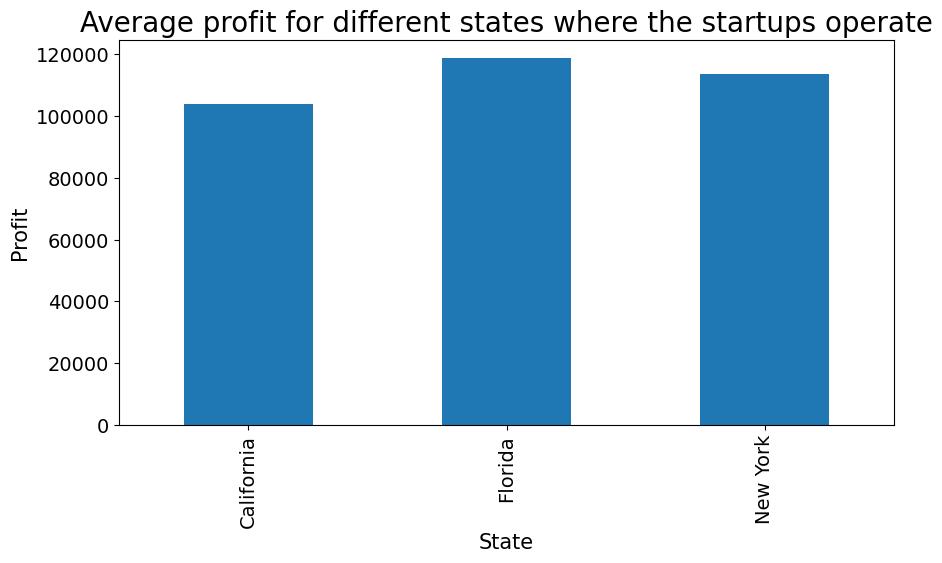

In [12]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
figsize = (10,5),
fontsize = 14
)
# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)
# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)


In [13]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [14]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

In [15]:
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [17]:
# Create a list of independent variables
dependent_variable='Profit'
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [18]:
independent_variables

['Florida_State',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Administration',
 'R&D Spend']

In [19]:
# Create the data of independent variables
X = dataset[independent_variables].values

In [20]:
# Create the dependent variable data
y = dataset[dependent_variable].values

In [21]:
dataset[independent_variables]


,Florida_State,Marketing Spend,NewYork_State,California_State,Administration,R&D Spend
0,0,471784.10,1,0,136897.80,165349.20
1,0,443898.53,0,1,151377.59,162597.70
2,1,407934.54,0,0,101145.55,153441.51
3,0,383199.62,1,0,118671.85,144372.41
4,1,366168.42,0,0,91391.77,142107.34
5,0,362861.36,1,0,99814.71,131876.90
6,0,127716.82,0,1,147198.87,134615.46
7,1,323876.68,0,0,145530.06,130298.13
8,0,311613.29,1,0,148718.95,120542.52
9,0,304981.62,0,1,108679.17,123334.88


In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
 X_train[0:10]

array([[1.0000000e+00, 2.1463481e+05, 0.0000000e+00, 0.0000000e+00,
        1.0305749e+05, 5.5493950e+04],
       [0.0000000e+00, 2.0551764e+05, 1.0000000e+00, 0.0000000e+00,
        8.5047440e+04, 4.6014020e+04],
       [1.0000000e+00, 1.3405007e+05, 0.0000000e+00, 0.0000000e+00,
        1.4413598e+05, 7.5328870e+04],
       [0.0000000e+00, 2.1079767e+05, 0.0000000e+00, 1.0000000e+00,
        1.5769392e+05, 4.6426070e+04],
       [1.0000000e+00, 2.9491957e+05, 0.0000000e+00, 0.0000000e+00,
        1.1417579e+05, 9.1749160e+04],
       [1.0000000e+00, 3.2387668e+05, 0.0000000e+00, 0.0000000e+00,
        1.4553006e+05, 1.3029813e+05],
       [1.0000000e+00, 2.5651292e+05, 0.0000000e+00, 0.0000000e+00,
        1.5654742e+05, 1.1994324e+05],
       [0.0000000e+00, 1.9039300e+03, 1.0000000e+00, 0.0000000e+00,
        1.2415304e+05, 1.0002300e+03],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        5.1743150e+04, 5.4205000e+02],
       [0.0000000e+00, 1.0713838e+05,

In [24]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train[0:10]

array([[1.        , 0.45494286, 0.        , 0.        , 0.48655174,
        0.33561668],
       [0.        , 0.43561799, 1.        , 0.        , 0.3173015 ,
        0.2782839 ],
       [1.        , 0.28413435, 0.        , 0.        , 0.87258866,
        0.45557444],
       [0.        , 0.44680961, 0.        , 1.        , 1.        ,
        0.2807759 ],
       [1.        , 0.62511553, 0.        , 0.        , 0.59103645,
        0.55488118],
       [1.        , 0.68649342, 0.        , 0.        , 0.88568959,
        0.7880179 ],
       [1.        , 0.54370828, 0.        , 0.        , 0.98922572,
        0.72539353],
       [0.        , 0.0040356 , 1.        , 0.        , 0.6847981 ,
        0.0060492 ],
       [0.        , 0.        , 1.        , 0.        , 0.00432296,
        0.00327821],
       [0.        , 0.22709197, 1.        , 0.        , 0.95618996,
        0.39676926]])

In [26]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
 regressor.intercept_

44153.95466784864

In [28]:
 regressor.coef_


array([-8.72645791e+02,  1.72720281e+04,  7.86007422e+02,  8.66383692e+01,
        3.49927567e+03,  1.27892182e+05])

In [29]:
 y_pred_train = regressor.predict(X_train)


In [30]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [31]:
 # Predicting the Test set results
 y_pred = regressor.predict(X_test)

In [32]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [33]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [34]:
 mean_squared_error(y_test, y_pred)

83502864.03257713

In [35]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [36]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794931

In [37]:
r2_score(y_train, y_pred_train)

0.9501847627493607